In [19]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

### 1.1.1) Retornando array flatten

In [20]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

### 1.1.2) Padronizar as características (normalização)

In [21]:
def config_standart_scaler(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

## 1.2) Carregar os dados de treinamento e teste

In [22]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)
    # y_train, y_test = config_standart_scaler(X_train, X_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [23]:
def train_decision_tree(X_train, y_train):
    tree_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1) 

    cv_scores = cross_val_predict(tree_model, X_train, y_train, cv=5)

    tree_model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy = accuracy_score(y_train, cv_scores)
    f1 = f1_score(y_train, cv_scores, average='weighted')  # 'weighted' para lidar com classes desbalanceadas
    recall_per_class = recall_score(y_train, cv_scores, average=None)  # Revocação por classe
    recall_average = sum(recall_per_class) / len(recall_per_class)  # Média da revocação
    precision_per_class = precision_score(y_train, cv_scores, average=None)  # Precisão por classe
    precision_average = sum(precision_per_class) / len(precision_per_class)  # Média da precisão

    return accuracy, f1, recall_average, precision_average, tree_model

## 1.4) Carregando dados e treinando (Cross validation)

In [24]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_decision_tree(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.9842857142857143
F1: 0.9842914699955009
Revocação: 0.9851868818736714
Precisão: 0.9849244819903222

Conjunto 2
Acurácia: 0.9914285714285714
F1: 0.9914314084125869
Revocação: 0.9924906893668769
Precisão: 0.9911110279378862

Conjunto 3
Acurácia: 0.9842857142857143
F1: 0.984279593914916
Revocação: 0.9859805764411028
Precisão: 0.9839574343503775

Conjunto 4
Acurácia: 0.9928571428571429
F1: 0.9928545996068768
Revocação: 0.993518990207732
Precisão: 0.9920152857018595

Conjunto 5
Acurácia: 0.9885714285714285
F1: 0.9885795175326061
Revocação: 0.9898939089079933
Precisão: 0.9889800881592947

Conjunto 6


Acurácia: 0.9928571428571429
F1: 0.9928580442014826
Revocação: 0.992840965061561
Precisão: 0.993731254038519

Conjunto 7
Acurácia: 0.9871428571428571
F1: 0.9871371159411668
Revocação: 0.9873445722728555
Precisão: 0.9876698147990584

Conjunto 8
Acurácia: 0.9914285714285714
F1: 0.9914298406072718
Revocação: 0.9925894578454884
Precisão: 0.9923964736179252

Conjunto 9
Acurácia: 0.9928571428571429
F1: 0.9928588541248033
Revocação: 0.9937582924160105
Precisão: 0.9934449862610782

Conjunto 10
Acurácia: 0.98
F1: 0.9800313533846109
Revocação: 0.9809367034198706
Precisão: 0.9803157310287679


## 1.5) Analisando resultados gerais

In [25]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.988571  0.988855   0.989454  0.988575


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


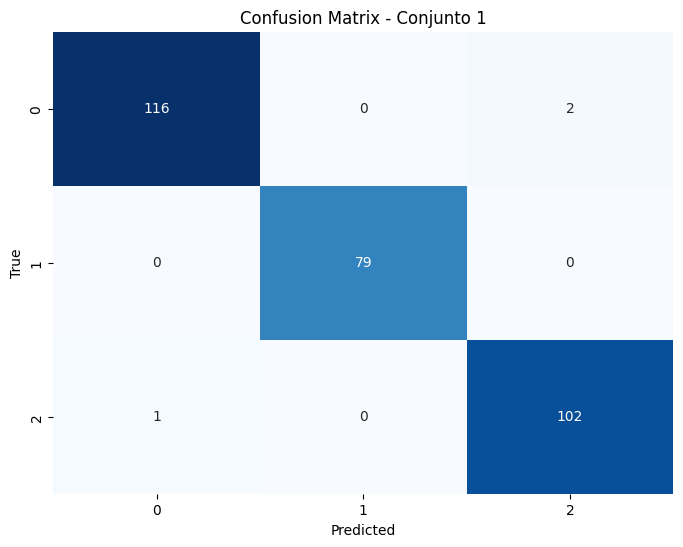

Acurácia no conjunto de teste: 99.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      0.98      0.99       118
         Mal       1.00      1.00      1.00        79
       Medio       0.98      0.99      0.99       103

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 2


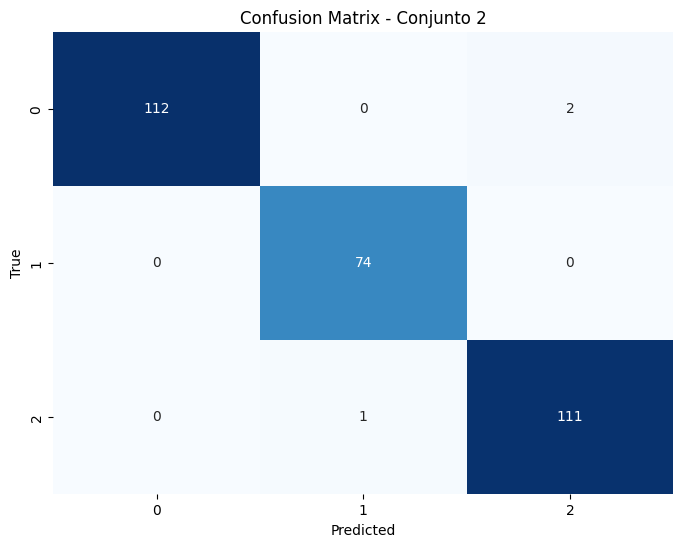

Acurácia no conjunto de teste: 99.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      0.98      0.99       114
         Mal       0.99      1.00      0.99        74
       Medio       0.98      0.99      0.99       112

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 3


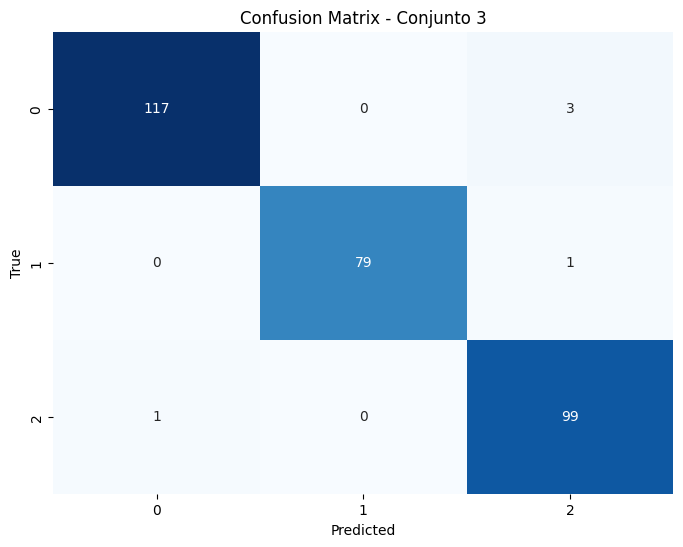

Acurácia no conjunto de teste: 98.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      0.97      0.98       120
         Mal       1.00      0.99      0.99        80
       Medio       0.96      0.99      0.98       100

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


----------------------------------------------------------------

Eficácia do conjunto 4


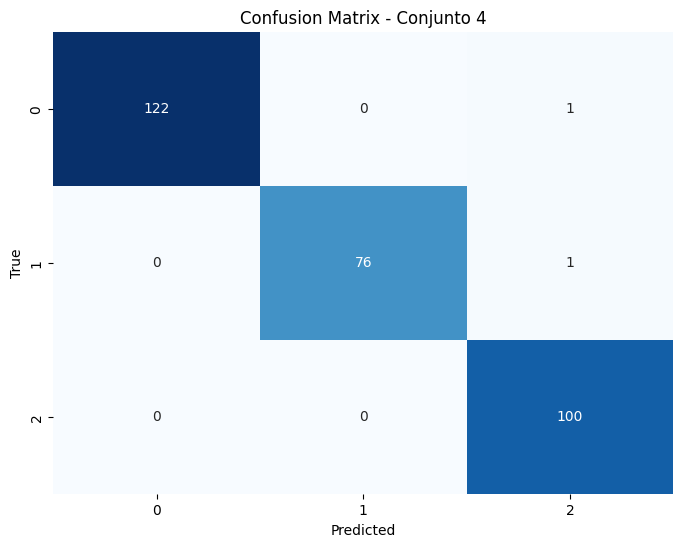

Acurácia no conjunto de teste: 99.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      0.99      1.00       123
         Mal       1.00      0.99      0.99        77
       Medio       0.98      1.00      0.99       100

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 5


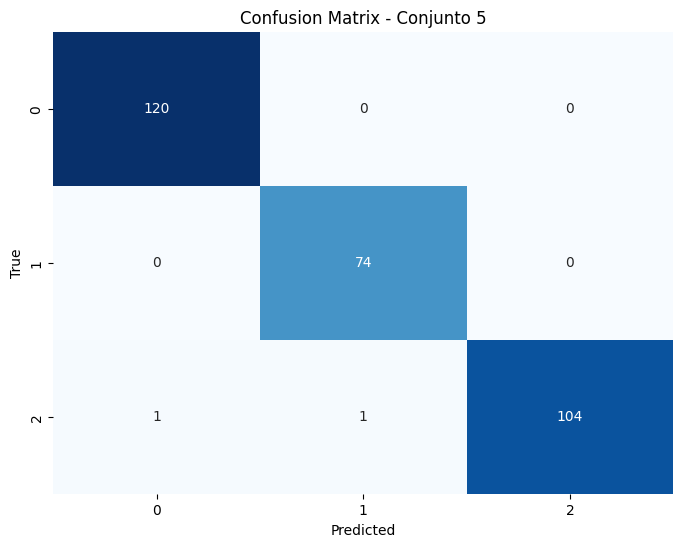

Acurácia no conjunto de teste: 99.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      1.00      1.00       120
         Mal       0.99      1.00      0.99        74
       Medio       1.00      0.98      0.99       106

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 6


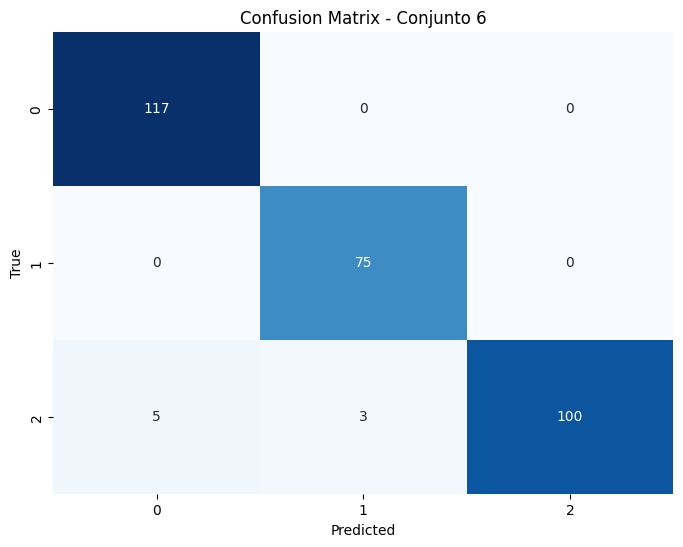

Acurácia no conjunto de teste: 97.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.96      1.00      0.98       117
         Mal       0.96      1.00      0.98        75
       Medio       1.00      0.93      0.96       108

    accuracy                           0.97       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.97      0.97      0.97       300


----------------------------------------------------------------

Eficácia do conjunto 7


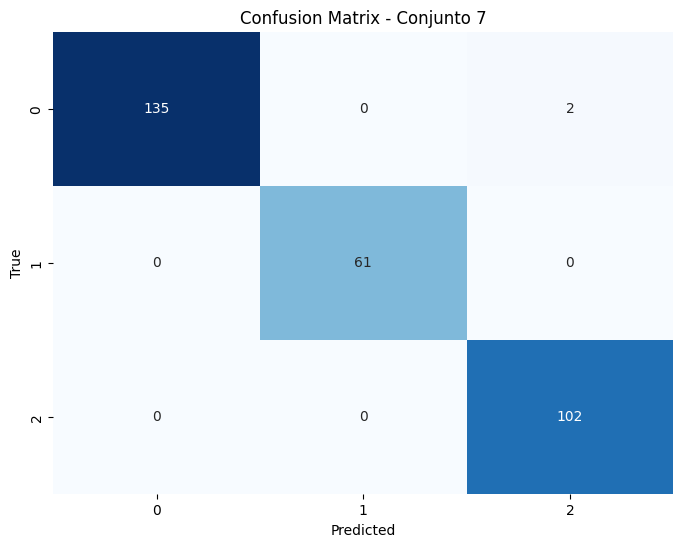

Acurácia no conjunto de teste: 99.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      0.99      0.99       137
         Mal       1.00      1.00      1.00        61
       Medio       0.98      1.00      0.99       102

    accuracy                           0.99       300
   macro avg       0.99      1.00      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 8


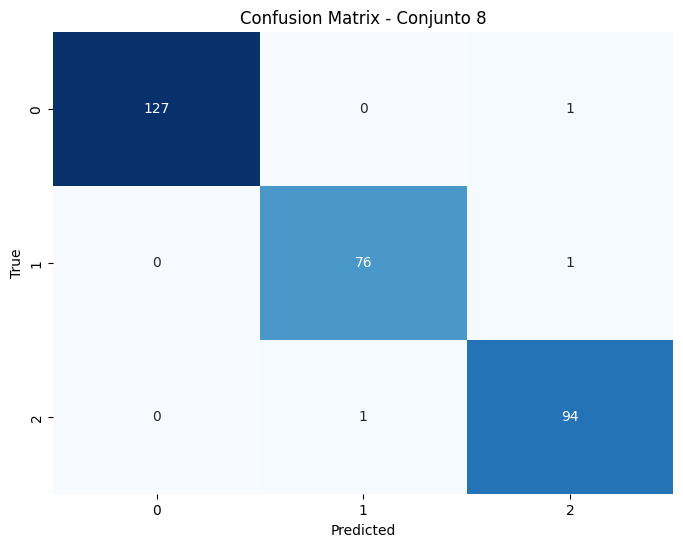

Acurácia no conjunto de teste: 99.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      0.99      1.00       128
         Mal       0.99      0.99      0.99        77
       Medio       0.98      0.99      0.98        95

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 9


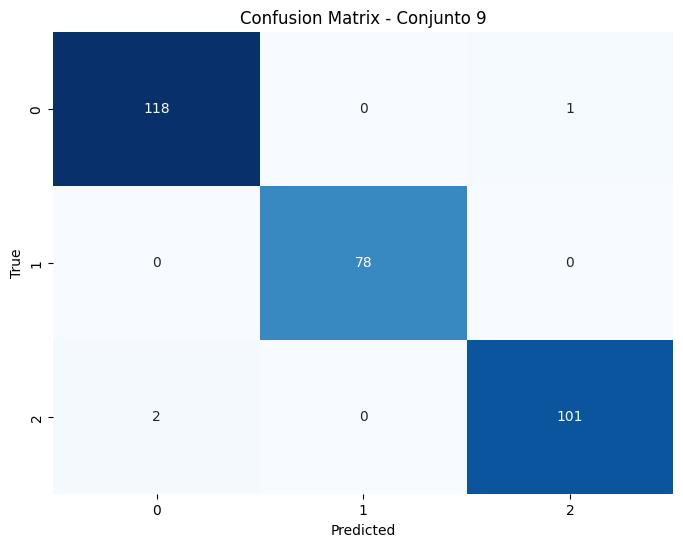

Acurácia no conjunto de teste: 99.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.98      0.99      0.99       119
         Mal       1.00      1.00      1.00        78
       Medio       0.99      0.98      0.99       103

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


----------------------------------------------------------------

Eficácia do conjunto 10


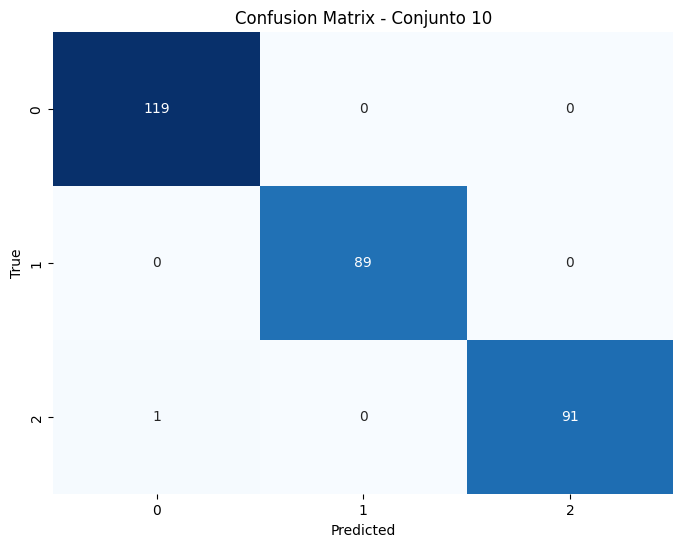

Acurácia no conjunto de teste: 99.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.99      1.00      1.00       119
         Mal       1.00      1.00      1.00        89
       Medio       1.00      0.99      0.99        92

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


----------------------------------------------------------------



In [26]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')


    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [27]:
# Find the index of the conjunto with the highest average accuracy
best_conjunto_index = np.argmax(average_accuracies)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


O conjunto 10 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [28]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 6 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [29]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [30]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Teste diferentes critérios de divisão
    'max_depth': [None, 10, 20, 30],  # Teste diferentes profundidades máximas da árvore
    'min_samples_split': [2, 4, 5, 10],  # Teste diferentes valores mínimos para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Teste diferentes valores mínimos para folhas
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5, 10]},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

In [31]:
# Seus dados do GridSearchCV
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  # Adicione o índice de linha (i+1)
    table_data.append(row)

# Crie a tabela usando a função tabulate
table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                                                             │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}     │ 1             │ 0.992857           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}     │ 1             │ 0.992857           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼──

## 2.4) Analisando Cada combinação para var_smoothing

In [32]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

## 2.5) Tabela comparativa para todas combinações

In [33]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                                                             │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}     │ 1             │ 0.992857           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}     │ 1             │ 0.992857           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼──

## 2.6) Predição para o melhor modelo

In [34]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

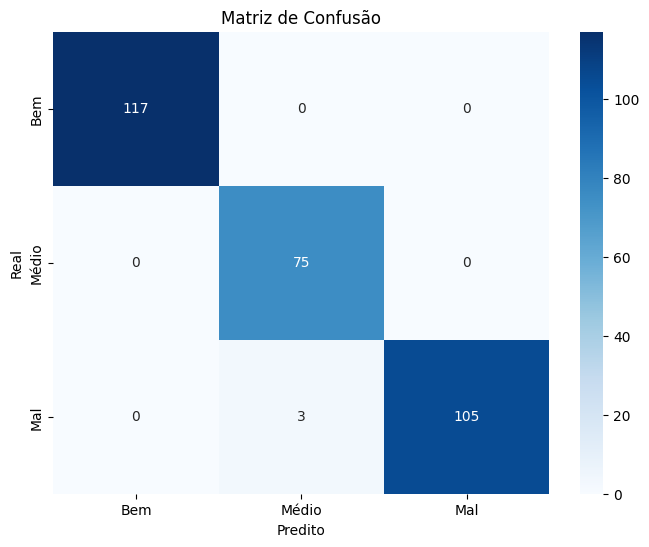

In [35]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [36]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia do teste: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      1.00      1.00       117
         Mal       0.96      1.00      0.98        75
       Medio       1.00      0.97      0.99       108

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

----------------------------------------------------------------

Acurácia do teste: 0.99
Precisão: 0.9903846153846154
Recall: 0.99
Medida F: 0.9900276166804751
